In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [16]:
dataset= pd.read_csv(r"C:\Users\subha\Downloads\Customer_Churn_Recently_Data.csv")

In [55]:
dataset.head(5)

,CustomerID,Gender,Age,Tenure,MonthlyCharges,TotalCharges,Contract,InternetService,StreamingTV,PaymentMethod,Churn,cluster
0,C00001,Male,64,53,38.34,2032.02,Two year,Fiber,Yes,Credit Card,0,0
1,C00002,Female,29,59,90.93,5364.87,One year,DSL,Yes,UPI,0,2
2,C00003,Male,33,41,33.73,1382.93,Month-to-Month,Fiber,No,UPI,0,0
3,C00004,Male,41,68,25.89,1760.52,Month-to-Month,Fiber,Yes,Credit Card,1,0
4,C00005,Male,36,68,105.33,7162.44,Month-to-Month,DSL,Yes,Credit Card,0,1


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       2000 non-null   object 
 1   Gender           2000 non-null   object 
 2   Age              2000 non-null   int64  
 3   Tenure           2000 non-null   int64  
 4   MonthlyCharges   2000 non-null   float64
 5   TotalCharges     2000 non-null   float64
 6   Contract         2000 non-null   object 
 7   InternetService  2000 non-null   object 
 8   StreamingTV      2000 non-null   object 
 9   PaymentMethod    2000 non-null   object 
 10  Churn            2000 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 172.0+ KB


In [19]:
dataset.shape

(2000, 11)

In [20]:
dataset.columns

Index(['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges',
       'TotalCharges', 'Contract', 'InternetService', 'StreamingTV',
       'PaymentMethod', 'Churn'],
      dtype='object')

In [22]:
dataset.dtypes

CustomerID          object
Gender              object
Age                  int64
Tenure               int64
MonthlyCharges     float64
TotalCharges       float64
Contract            object
InternetService     object
StreamingTV         object
PaymentMethod       object
Churn               object
dtype: object

In [23]:
dataset.describe()

,Age,Tenure,MonthlyCharges,TotalCharges
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,43.307500,36.729000,83.637920,3067.119720
std,14.813057,20.223107,37.847855,2315.757208
min,18.000000,1.000000,20.020000,21.140000
25%,31.000000,19.000000,50.667500,1241.805000
50%,43.000000,37.000000,83.360000,2525.950000
75%,56.000000,55.000000,116.212500,4422.622500
max,69.000000,71.000000,149.880000,10491.670000


In [24]:
dataset.isnull().sum()

CustomerID         0
Gender             0
Age                0
Tenure             0
MonthlyCharges     0
TotalCharges       0
Contract           0
InternetService    0
StreamingTV        0
PaymentMethod      0
Churn              0
dtype: int64

In [56]:
dataset.duplicated().sum()


0

In [28]:
dataset["Churn"] = dataset["Churn"].str.strip().str.lower().map({"yes": 1, "no": 0})


In [57]:
dataset.describe(include=["object", "bool"])


,CustomerID,Gender,Contract,InternetService,StreamingTV,PaymentMethod
count,2000,2000,2000,2000,2000,2000
unique,2000,2,3,3,2,3
top,C00001,Male,Month-to-Month,Fiber,Yes,Credit Card
freq,1,1016,1169,992,1302,807


In [30]:
dataset["Churn"].value_counts()

Churn
0    1506
1     494
Name: count, dtype: int64

In [58]:
dataset["Churn"].value_counts(normalize=True)

Churn
0    0.753
1    0.247
Name: proportion, dtype: float64

In [33]:
print(dataset.columns.tolist())


['CustomerID', 'Gender', 'Age', 'Tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'InternetService', 'StreamingTV', 'PaymentMethod', 'Churn']


In [36]:
x = dataset.iloc[:, [3, 4]].values
y = dataset.iloc[:,-1].values


In [37]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

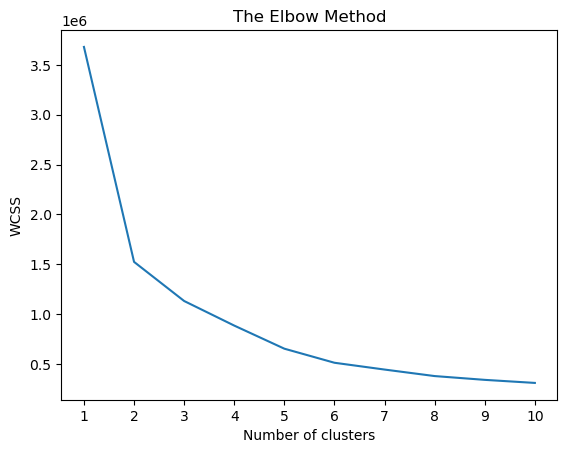

In [59]:
# Plotting the results
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))  # Optional: set x-ticks to match cluster numbers
plt.show()


In [39]:
optimal_k = 5  # Replace with your optimal k based on the elbow method
kmeans = KMeans(n_clusters=optimal_k, init="k-means++", random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [60]:
dataset['cluster'] = y_kmeans

In [61]:
print(dataset.head())

  CustomerID  Gender  Age  Tenure  MonthlyCharges  TotalCharges  \
0     C00001    Male   64      53           38.34       2032.02   
1     C00002  Female   29      59           90.93       5364.87   
2     C00003    Male   33      41           33.73       1382.93   
3     C00004    Male   41      68           25.89       1760.52   
4     C00005    Male   36      68          105.33       7162.44   

         Contract InternetService StreamingTV PaymentMethod  Churn  cluster  
0        Two year           Fiber         Yes   Credit Card      0        0  
1        One year             DSL         Yes           UPI      0        2  
2  Month-to-Month           Fiber          No           UPI      0        0  
3  Month-to-Month           Fiber         Yes   Credit Card      1        0  
4  Month-to-Month             DSL         Yes   Credit Card      0        1  


In [ ]:
# Plotting the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=100, c='magenta', label='Cluster 5')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')

# Customizing the plot
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=0)

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [47]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=4,n_estimators=60,random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=4, n_estimators=60, random_state=0)

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(x_train,y_train)

SVC(random_state=0)

In [49]:
y_pred = classifier.predict(x_test)

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[303   0]
 [ 97   0]]


In [51]:
from sklearn.metrics import accuracy_score
ac =accuracy_score(y_test, y_pred)
print(ac)

0.7575


In [65]:
bias = classifier.score(x_train,y_train)
print(bias)

0.751875


In [66]:
variance  = classifier.score(x_test, y_test)
print(variance)

0.7575


In [54]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator= classifier, X= x_train, y=y_train, cv = 5)
print("Accuracy:{:.2f} %".format(accuracies.mean()*100))
#print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))

Accuracy:75.19 %
